### Predictive Analytics Exam [PGR304] ###
2023 Autumn

Canadidate 2002

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
from pandas import Series,DataFrame
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

### Task 1: Understanding the data ###

In [2]:
# Load the dataset
data = pd.read_csv('DataSet_4_Exam.csv')
data.head()

,Unnamed: 0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Result
0,0,0.134842,1191.742676,41.507889,4.691728,3.049478,2.138430,4.305591,4272.666992,139.076599,...,0.510055,0.806333,0.449914,841.148804,23.524372,17.455412,27.178885,1.0,5,2
1,1,0.118853,1206.649292,41.781891,5.887320,3.350271,2.698908,4.039053,4274.158691,139.125168,...,1.296457,0.238310,0.425843,730.358582,20.788883,12.424165,27.599531,1.0,5,2
2,2,0.538094,2164.658936,72.728867,16.221436,12.332704,7.785572,3.701066,4268.880859,138.953369,...,5.490809,2.425885,0.665966,1543.514160,35.843491,22.637938,34.238338,5.0,5,3
3,3,0.201133,2034.619629,72.419518,6.974368,3.560071,2.219646,3.950444,4291.068359,139.675568,...,1.379292,1.112216,0.401076,674.120667,20.867197,15.904705,27.892487,1.0,5,1
4,4,0.109943,1207.436646,42.912621,9.026774,2.954104,3.698219,3.732934,4258.276367,138.654419,...,1.487997,0.887740,0.489169,651.093445,22.442629,23.063429,29.206781,3.0,7,2


In [3]:
# Rename the unknown column
data.rename(columns={'Unnamed: 0': 'Experiment Epoch'}, inplace=True)
data.head()

,Experiment Epoch,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Result
0,0,0.134842,1191.742676,41.507889,4.691728,3.049478,2.138430,4.305591,4272.666992,139.076599,...,0.510055,0.806333,0.449914,841.148804,23.524372,17.455412,27.178885,1.0,5,2
1,1,0.118853,1206.649292,41.781891,5.887320,3.350271,2.698908,4.039053,4274.158691,139.125168,...,1.296457,0.238310,0.425843,730.358582,20.788883,12.424165,27.599531,1.0,5,2
2,2,0.538094,2164.658936,72.728867,16.221436,12.332704,7.785572,3.701066,4268.880859,138.953369,...,5.490809,2.425885,0.665966,1543.514160,35.843491,22.637938,34.238338,5.0,5,3
3,3,0.201133,2034.619629,72.419518,6.974368,3.560071,2.219646,3.950444,4291.068359,139.675568,...,1.379292,1.112216,0.401076,674.120667,20.867197,15.904705,27.892487,1.0,5,1
4,4,0.109943,1207.436646,42.912621,9.026774,2.954104,3.698219,3.732934,4258.276367,138.654419,...,1.487997,0.887740,0.489169,651.093445,22.442629,23.063429,29.206781,3.0,7,2


In [4]:
# Check the data information and the missing null data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experiment Epoch  480 non-null    int64  
 1   Feature1          449 non-null    float64
 2   Feature2          449 non-null    float64
 3   Feature3          449 non-null    float64
 4   Feature4          449 non-null    float64
 5   Feature5          449 non-null    float64
 6   Feature6          449 non-null    float64
 7   Feature7          480 non-null    float64
 8   Feature8          480 non-null    float64
 9   Feature9          480 non-null    float64
 10  Feature10         480 non-null    int64  
 11  Feature11         480 non-null    float64
 12  Feature12         449 non-null    float64
 13  Feature13         449 non-null    float64
 14  Feature14         449 non-null    float64
 15  Feature15         449 non-null    float64
 16  Feature16         449 non-null    float64
 1

In [5]:
#Replacing all the NaN values with median 
data.fillna(data.median(),inplace= True)

# Check if there is any missing null data again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experiment Epoch  480 non-null    int64  
 1   Feature1          480 non-null    float64
 2   Feature2          480 non-null    float64
 3   Feature3          480 non-null    float64
 4   Feature4          480 non-null    float64
 5   Feature5          480 non-null    float64
 6   Feature6          480 non-null    float64
 7   Feature7          480 non-null    float64
 8   Feature8          480 non-null    float64
 9   Feature9          480 non-null    float64
 10  Feature10         480 non-null    int64  
 11  Feature11         480 non-null    float64
 12  Feature12         480 non-null    float64
 13  Feature13         480 non-null    float64
 14  Feature14         480 non-null    float64
 15  Feature15         480 non-null    float64
 16  Feature16         480 non-null    float64
 1

In [6]:
# Check the statistics
data.describe(include='all')

,Experiment Epoch,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Result
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,...,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.00000,480.000000,480.000000
mean,239.500000,0.363784,1745.059922,62.685217,10.483100,6.167682,4.154234,4.548136,4260.304330,140.111454,...,2.468686,1.365543,0.591886,767.103135,22.619079,16.194001,33.273415,2.11875,4.166667,1.672917
std,138.708327,0.774760,530.576600,19.505802,6.485653,4.993448,3.177813,6.350866,289.828745,9.318976,...,2.146197,1.311133,0.760207,301.699250,6.943558,3.918167,16.161659,1.22622,2.116969,1.004840
min,0.000000,0.034390,1111.951050,41.163975,3.061621,0.609971,0.303309,1.811385,1781.998779,63.744576,...,0.219388,0.053636,0.291396,80.504578,12.205297,11.162555,18.268045,1.00000,1.000000,1.000000
25%,119.750000,0.132338,1222.058441,43.738483,6.723465,3.184203,2.303381,3.581056,4263.331055,138.999668,...,1.214117,0.612193,0.388210,634.468872,19.664722,13.758813,28.419144,1.00000,2.750000,1.000000
50%,239.500000,0.174531,2008.752930,72.253914,8.297305,4.200125,3.386842,3.817585,4274.785156,139.437851,...,1.771419,1.125098,0.459151,683.571136,20.370440,14.505871,28.820759,2.00000,4.500000,1.000000
75%,359.250000,0.294538,2040.103912,73.053379,12.224048,7.626526,5.097166,3.976507,4289.556641,139.669094,...,3.097901,1.693383,0.576905,769.372833,22.566366,18.415751,30.899847,3.00000,5.500000,2.000000
max,479.000000,7.910289,4454.433594,144.993164,38.000000,35.983173,26.459568,95.532845,8037.217285,261.613861,...,15.884307,11.531405,11.735254,1896.834473,83.929665,33.801250,138.736099,10.00000,7.000000,5.000000


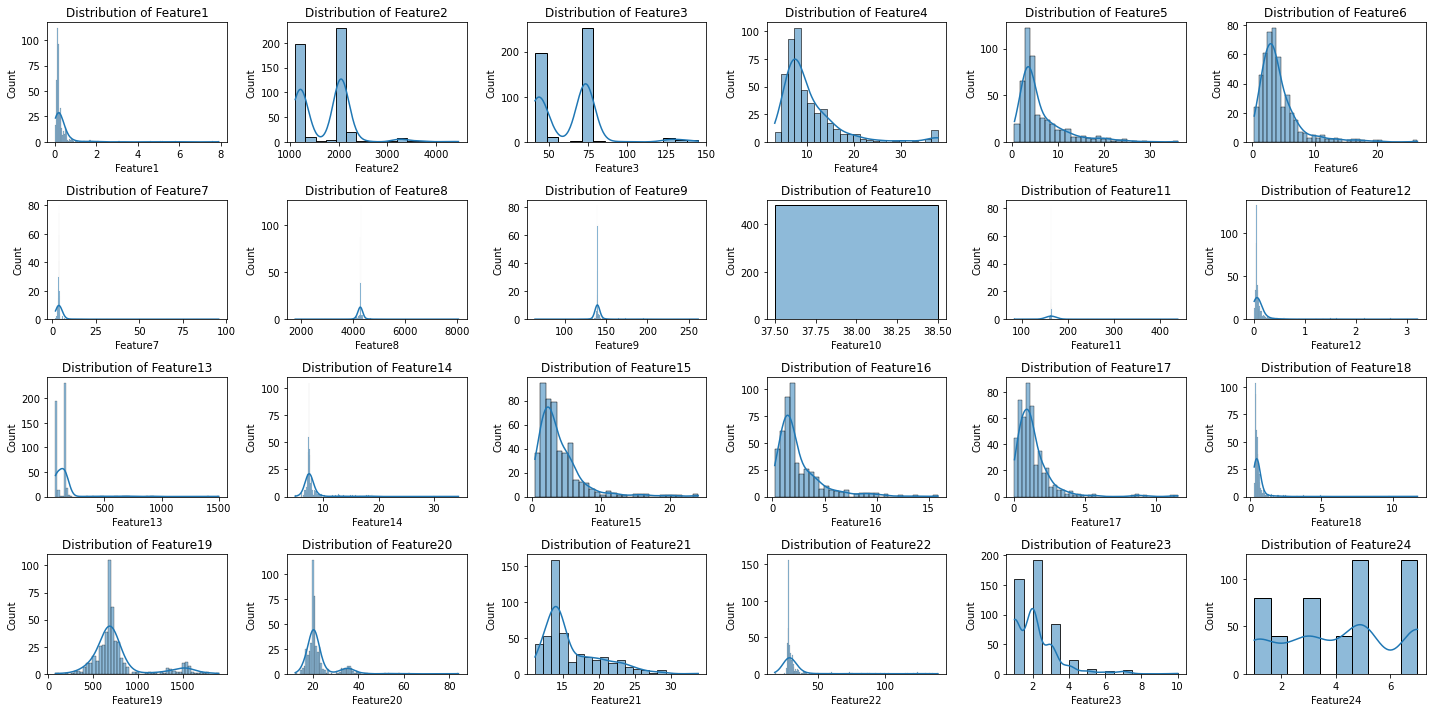

C:\Users\Ling\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


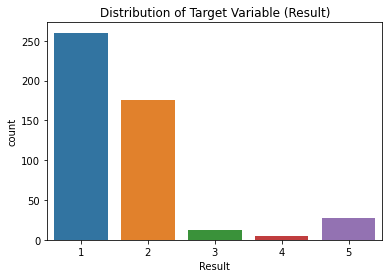

,Result
1,260
2,176
5,27
3,12
4,5


In [7]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Plot distribution of a single feature
for i, feature in enumerate(['Feature1', 'Feature2', 'Feature3', 'Feature4','Feature5', 'Feature6', 'Feature7', 'Feature8',
                            'Feature9', 'Feature10', 'Feature11', 'Feature12', 'Feature13', 'Feature14', 'Feature15', 'Feature16',
                            'Feature17', 'Feature18', 'Feature19', 'Feature20', 'Feature21', 'Feature22', 'Feature23', 'Feature24',]):
    plt.subplot(4, 6, i+1)  # Create a subplot for each feature
    sns.histplot(data[feature], kde=True)  # KDE plot overlays the histogram
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Plot the distribution of the target variable
y = data['Result']
sns.countplot(y, data=data)
plt.title('Distribution of Target Variable (Result)')
plt.show()

pd.DataFrame(y.value_counts())

In [8]:
# Drop the 'Experiment Epoch' if it exists, 'Feature10' as it seems to be constant,
df = data.drop(['Experiment Epoch', 'Feature10'], axis=1)
# Check the data correlation in a matrix by using 'Pearson'
df.corr(method='pearson')

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature11,...,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Result
Feature1,1.000000,0.585535,0.602473,0.703540,0.608778,0.691722,0.170895,0.076932,0.209557,0.097931,...,0.686596,0.750373,0.081791,0.166131,0.172982,0.129474,0.218698,0.543893,0.022909,0.171247
Feature2,0.585535,1.000000,0.985997,0.499760,0.456058,0.446240,0.137599,0.028089,0.142392,0.139915,...,0.523863,0.582129,0.140191,0.135784,0.164663,0.172543,0.210115,0.386895,0.063252,0.105784
Feature3,0.602473,0.985997,1.000000,0.524631,0.483858,0.473869,0.135880,0.022018,0.135193,0.139165,...,0.541178,0.591421,0.135216,0.131686,0.159293,0.180223,0.212494,0.422362,0.076587,0.120932
Feature4,0.703540,0.499760,0.524631,1.000000,0.810153,0.933565,0.045460,0.012967,0.081297,0.067710,...,0.898744,0.806788,0.033936,0.161839,0.142232,0.150889,0.202235,0.565578,0.043367,0.241024
Feature5,0.608778,0.456058,0.483858,0.810153,1.000000,0.888248,0.010920,-0.006919,0.063523,0.011658,...,0.951932,0.675717,0.027804,0.127078,0.092429,0.157642,0.145693,0.472920,0.085786,0.202107
Feature6,0.691722,0.446240,0.473869,0.933565,0.888248,1.000000,0.055299,0.006783,0.082931,0.051949,...,0.927400,0.824517,0.044635,0.142220,0.130206,0.160972,0.180263,0.562364,0.040283,0.296198
Feature7,0.170895,0.137599,0.135880,0.045460,0.010920,0.055299,1.000000,0.560840,0.792894,0.298974,...,0.034331,0.098746,0.925463,0.330305,0.404748,0.194203,0.267950,0.069710,0.102515,0.360749
Feature8,0.076932,0.028089,0.022018,0.012967,-0.006919,0.006783,0.560840,1.000000,0.849295,-0.001717,...,0.000904,0.039228,0.459570,0.355110,0.300483,0.073061,0.002965,-0.001443,0.059454,-0.065106
Feature9,0.209557,0.142392,0.135193,0.081297,0.063523,0.082931,0.792894,0.849295,1.000000,0.193266,...,0.079584,0.123800,0.715502,0.385766,0.450230,0.181556,0.179510,0.079321,0.088240,0.186829
Feature11,0.097931,0.139915,0.139165,0.067710,0.011658,0.051949,0.298974,-0.001717,0.193266,1.000000,...,0.043746,0.111730,0.409479,0.344113,0.440092,0.282820,0.910098,0.036306,0.180310,0.541232


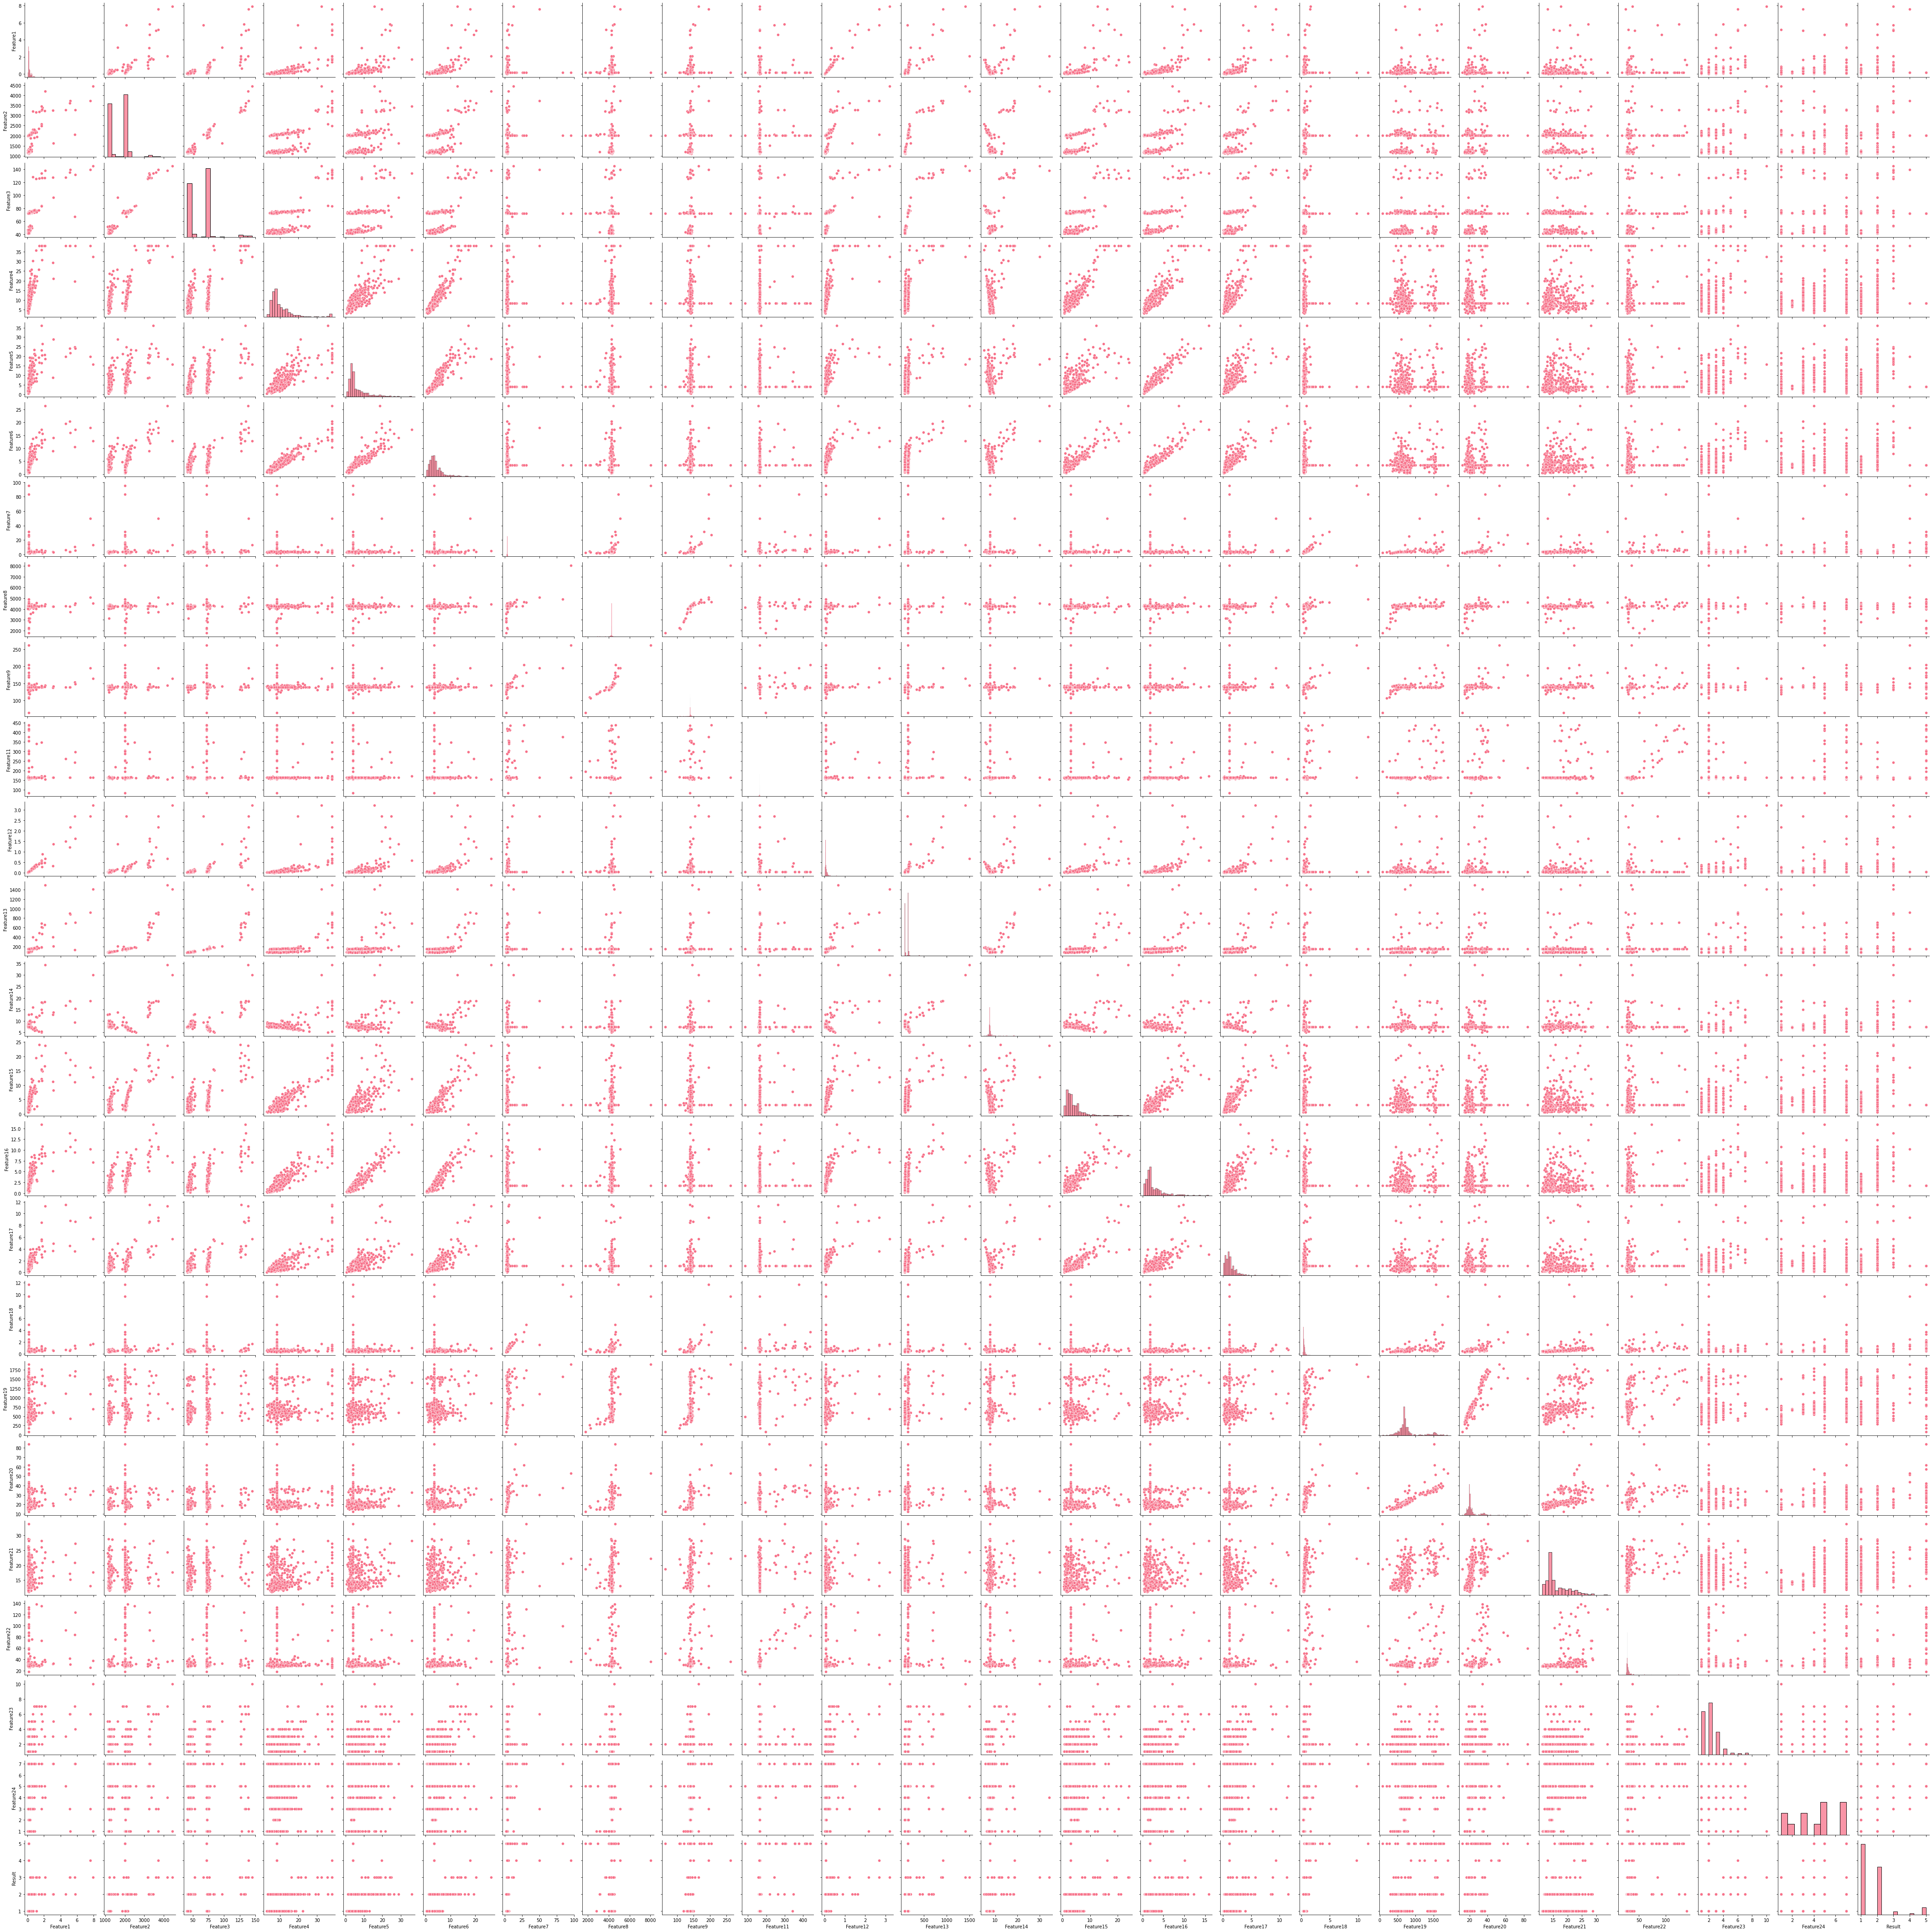

In [29]:
# Visualize the correlation of the dataset
sns.set_palette('husl')
%matplotlib inline

correlation = sns.pairplot(df, diag_kind='hist')
plt.show()

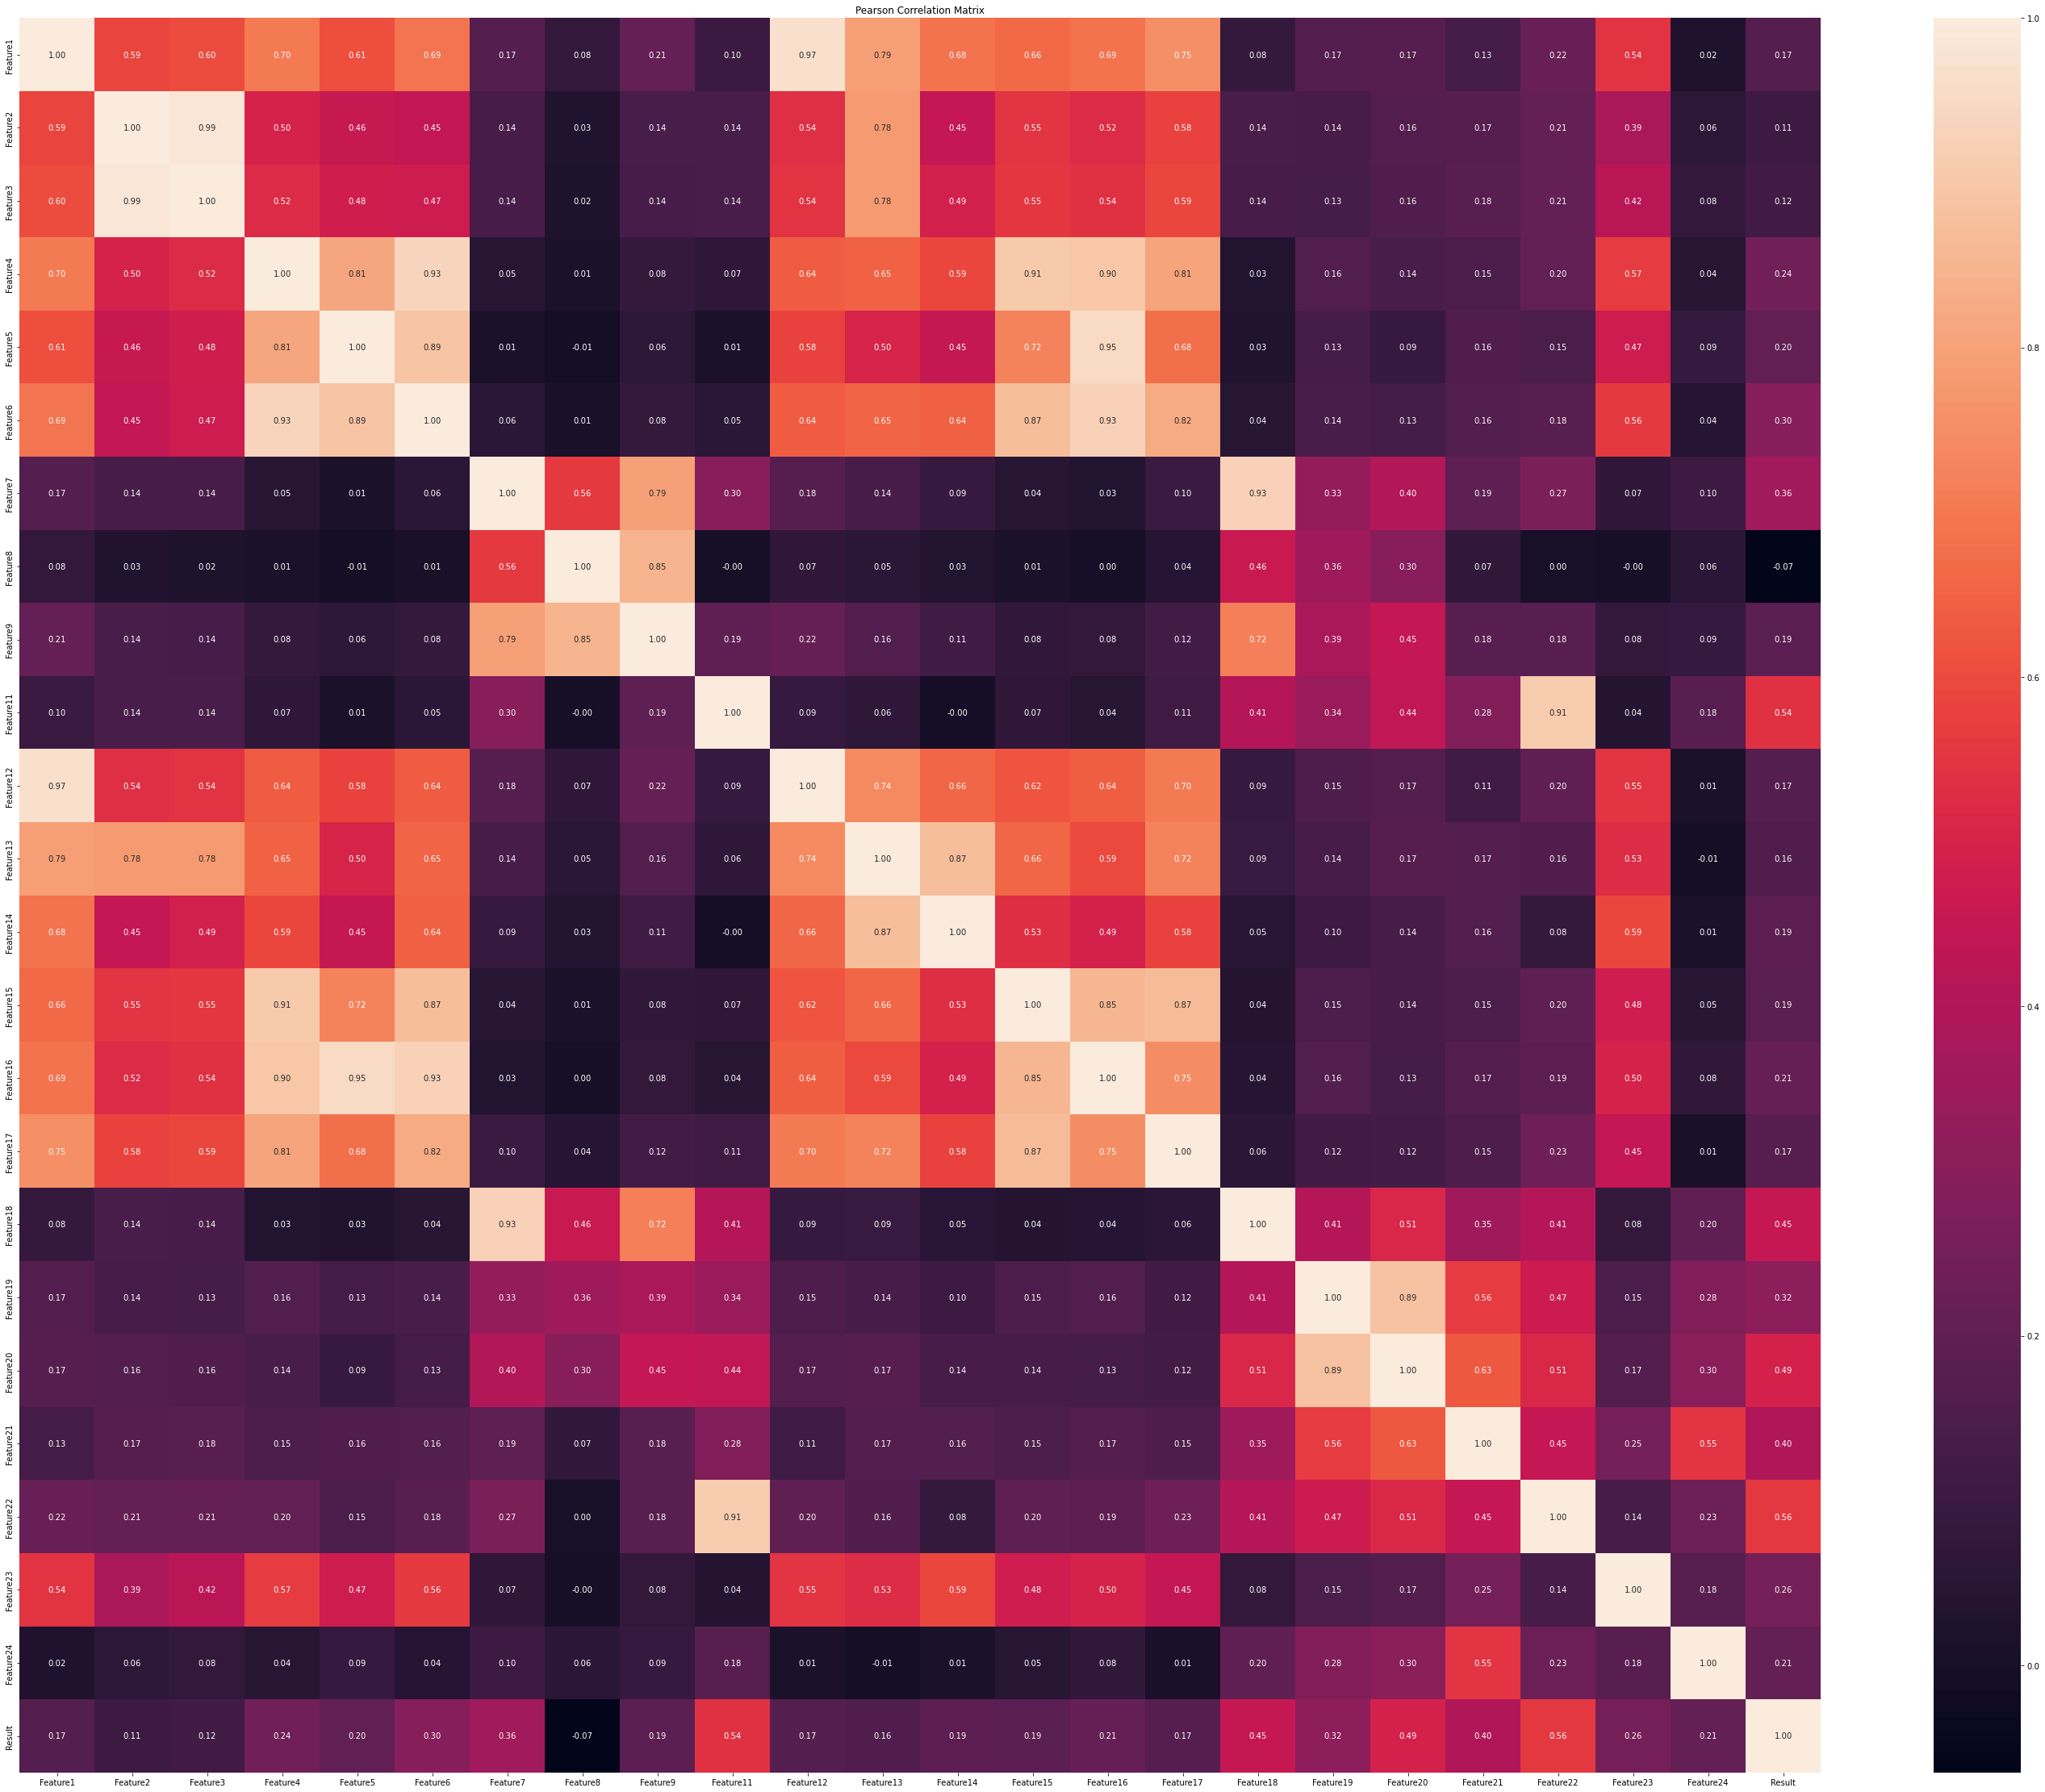

In [9]:
# Ref.: https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/ 
corr_matrix = df.corr(method='pearson')
plt.figure(figsize=(50, 40))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()

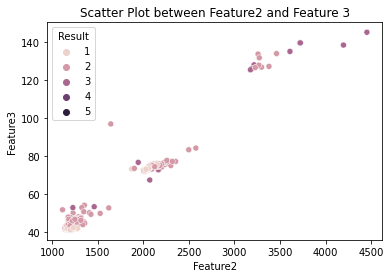

In [13]:
sns.scatterplot(x='Feature2', y='Feature3', hue='Result', data=df)
plt.title('Scatter Plot between Feature2 and Feature 3')
plt.show()

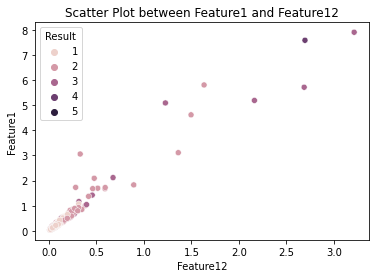

In [14]:
sns.scatterplot(x='Feature12', y='Feature1', hue='Result', data=df)
plt.title('Scatter Plot between Feature1 and Feature12')
plt.show()

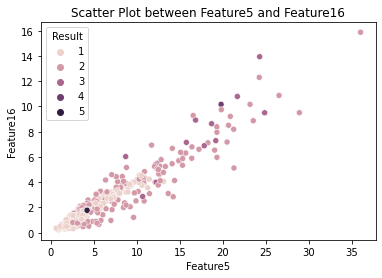

In [15]:
sns.scatterplot(x='Feature5', y='Feature16', hue='Result', data=df)
plt.title('Scatter Plot between Feature5 and Feature16')
plt.show()

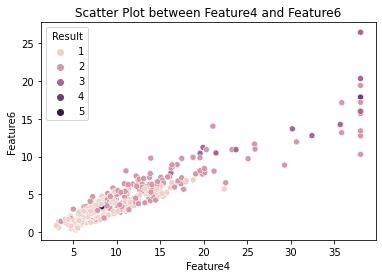

In [16]:
sns.scatterplot(x='Feature4', y='Feature6', hue='Result', data=df)
plt.title('Scatter Plot between Feature4 and Feature6')
plt.show()

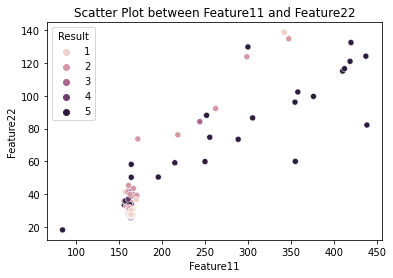

In [17]:
sns.scatterplot(x='Feature11', y='Feature22', hue='Result', data=df)
plt.title('Scatter Plot between Feature11 and Feature22')
plt.show()

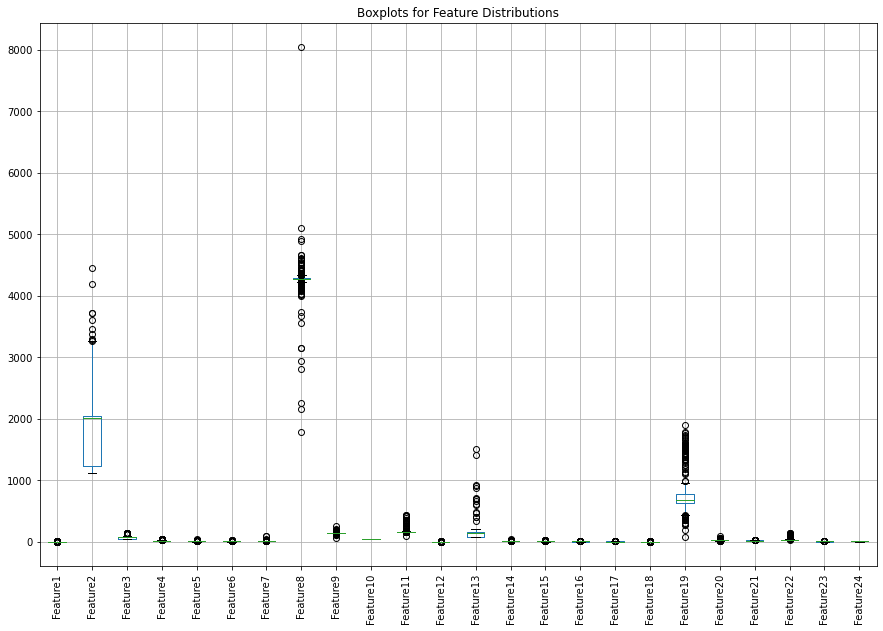

In [18]:
# Boxplots for feature distributions 
plt.figure(figsize=(15, 10))
data.drop(['Experiment Epoch', 'Result'], axis=1).boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots for Feature Distributions')
plt.show()

Skewness:
Feature1      6.695479
Feature2      1.059871
Feature3      1.235398
Feature4      2.545654
Feature5      2.156433
Feature6      2.581144
Feature7     11.300960
Feature8      1.188716
Feature9      5.260318
Feature11     5.152582
Feature12     7.634827
Feature13     6.600536
Feature14     6.862274
Feature15     2.775410
Feature16     2.393548
Feature17     3.859260
Feature18    10.983371
Feature19     1.738305
Feature20     3.229794
Feature21     1.278980
Feature22     4.646155
Feature23     2.016658
Feature24    -0.060890
Result        2.091842
dtype: float64


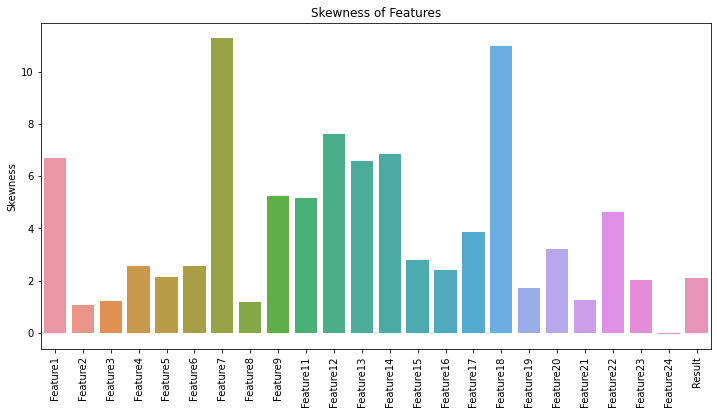

Kurtosis:
Feature1      50.953475
Feature2       2.693981
Feature3       3.065153
Feature4       7.396882
Feature5       5.519349
Feature6       9.738232
Feature7     142.827140
Feature8      83.614089
Feature9      79.817719
Feature11     27.303596
Feature12     66.168916
Feature13     53.694642
Feature14     60.934914
Feature15     10.511488
Feature16      7.459691
Feature17     21.762380
Feature18    141.970336
Feature19      2.582193
Feature20     16.835849
Feature21      1.117730
Feature22     22.218056
Feature23      6.432067
Feature24     -1.243682
Result         4.337238
dtype: float64


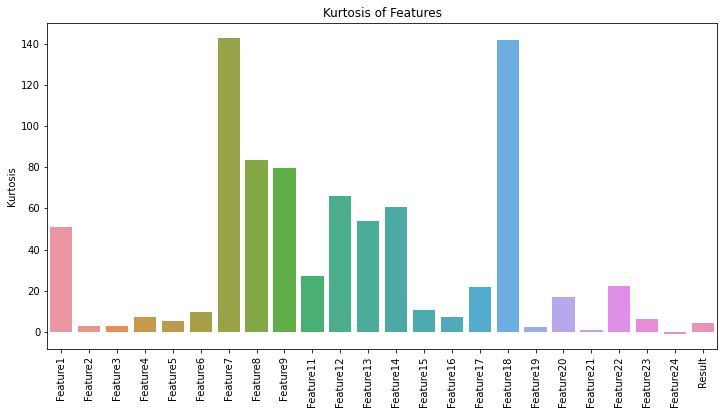

In [19]:
# Calculate skewness for each feature
skewness = df.skew()

# Calculate kurtosis for each feature
kurtosis = df.kurt()

print('Skewness:')
print(skewness)
# Plot for skewness
plt.figure(figsize=(12, 6))
sns.barplot(x=skewness.index, y=skewness.values)
plt.title('Skewness of Features')
plt.xticks(rotation=90)  # Rotate the feature names for better readability
plt.ylabel('Skewness')
plt.show()

print('Kurtosis:')
print(kurtosis)
# Plot for kurtosis
plt.figure(figsize=(12, 6))
sns.barplot(x=kurtosis.index, y=kurtosis.values)
plt.title('Kurtosis of Features')
plt.xticks(rotation=90)  # Rotate the feature names for better readability
plt.ylabel('Kurtosis')
plt.show()

### Task 2: Utility value ###

Data pre-processing

In [20]:
# Separate features and target
X = data.drop(['Result', 'Experiment Epoch'], axis=1)
y = data['Result']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=42, stratify=y)

# Feature Scaling - Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check for NaN values and replace them with the mean of the column
# np.isnan(X_scaled).any() returns True if any NaN values are present
if np.isnan(X_train_scaled).any():
    col_mean = np.nanmean(X_train_scaled, axis=0)
    inds = np.where(np.isnan(X_train_scaled))
    X_train_scaled[inds] = np.take(col_mean, inds[1])

# Check for inf values and replace them with a large finite number
# np.isinf(X_scaled).any() returns True if any infinite values are present
if np.isinf(X_train_scaled).any():
    X_train_scaled[X_train_scaled == np.inf] = np.finfo(np.float64).max
    X_train_scaled[X_train_scaled == -np.inf] = np.finfo(np.float64).min

# Check the shape of the training set
X_train.shape, y_train.shape

((465, 24), (465,))

### Task 3: Analysis, modeling and prediction ###

#### Analysis of Variance (ANOVA) statistical method ####

ANOVA results for Feature11 and Result: F-value = 87.61, p-value = 0.00000
ANOVA results for Feature22 and Result: F-value = 77.78, p-value = 0.00000


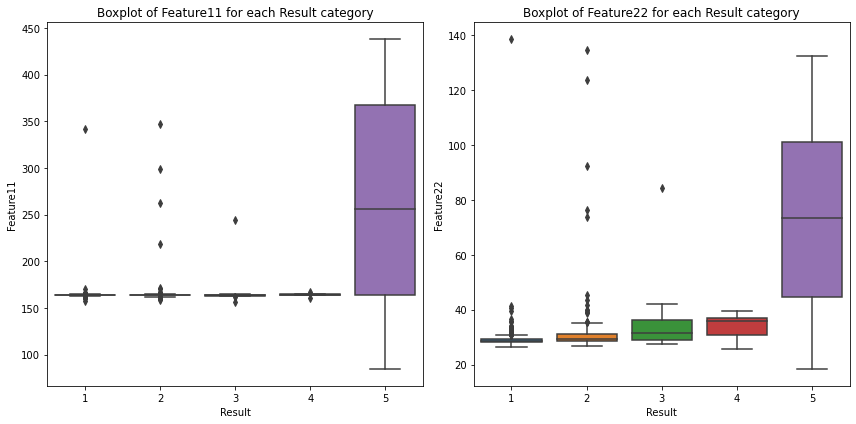

In [21]:
# Perform ANOVA for Feature11 and 'Result'
fvalue, pvalue = stats.f_oneway(
    df[df['Result'] == 1]['Feature11'],
    df[df['Result'] == 2]['Feature11'],
    df[df['Result'] == 3]['Feature11'],
    df[df['Result'] == 4]['Feature11'],
    df[df['Result'] == 5]['Feature11']
)
print('ANOVA results for Feature11 and Result: F-value = {:.2f}, p-value = {:.5f}'.format(fvalue, pvalue))

# Perform ANOVA for Feature22 and 'Result'
fvalue, pvalue = stats.f_oneway(
    df[df['Result'] == 1]['Feature22'],
    df[df['Result'] == 2]['Feature22'],
    df[df['Result'] == 3]['Feature22'],
    df[df['Result'] == 4]['Feature22'],
    df[df['Result'] == 5]['Feature22']
)
print('ANOVA results for Feature22 and Result: F-value = {:.2f}, p-value = {:.5f}'.format(fvalue, pvalue))

# Visualization with boxplots for Feature11 and Feature22 against 'Result'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Result', y='Feature11', data=df)
plt.title('Boxplot of Feature11 for each Result category')

plt.subplot(1, 2, 2)
sns.boxplot(x='Result', y='Feature22', data=df)
plt.title('Boxplot of Feature22 for each Result category')

plt.tight_layout()
plt.show()


ANOVA results for Feature23 and Result: F-value = 74.89, p-value = 0.00000
ANOVA results for Feature24 and Result: F-value = 7.39, p-value = 0.00001


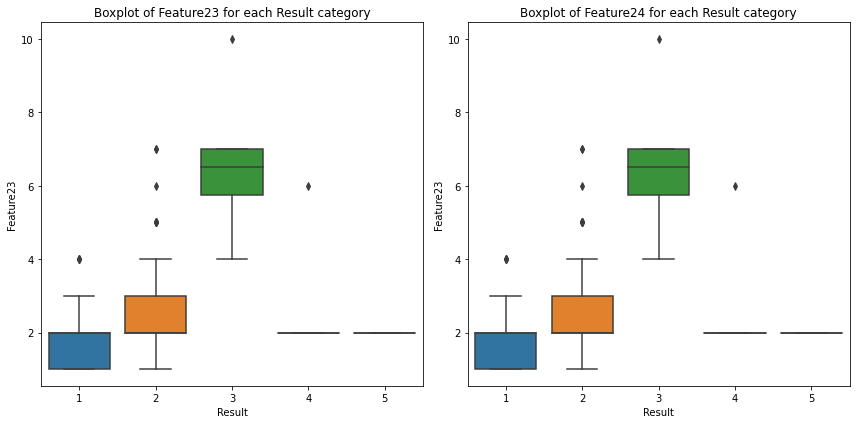

In [22]:
# Perform ANOVA for Feature23 and 'Result'
fvalue, pvalue = stats.f_oneway(
    df[df['Result'] == 1]['Feature23'],
    df[df['Result'] == 2]['Feature23'],
    df[df['Result'] == 3]['Feature23'],
    df[df['Result'] == 4]['Feature23'],
    df[df['Result'] == 5]['Feature23']
)
print('ANOVA results for Feature23 and Result: F-value = {:.2f}, p-value = {:.5f}'.format(fvalue, pvalue))

# Perform ANOVA for Feature24 and 'Result'
fvalue, pvalue = stats.f_oneway(
    df[df['Result'] == 1]['Feature24'],
    df[df['Result'] == 2]['Feature24'],
    df[df['Result'] == 3]['Feature24'],
    df[df['Result'] == 4]['Feature24'],
    df[df['Result'] == 5]['Feature24']
)
print('ANOVA results for Feature24 and Result: F-value = {:.2f}, p-value = {:.5f}'.format(fvalue, pvalue))

# Visualization with boxplots for Feature11 and Feature22 against 'Result'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Result', y='Feature23', data=df)
plt.title('Boxplot of Feature23 for each Result category')

plt.subplot(1, 2, 2)
sns.boxplot(x='Result', y='Feature23', data=df)
plt.title('Boxplot of Feature24 for each Result category')

plt.tight_layout()
plt.show()


#### Logit Model ####

C:\Users\Ling\Anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Ling\Anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


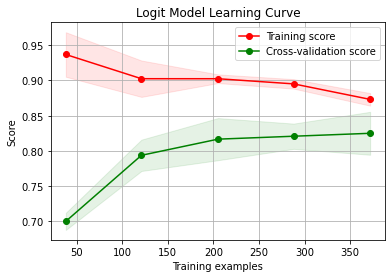

,Result,prediction
0,1,1
1,1,1
2,2,1
3,2,1
4,1,1
5,5,1
6,2,1
7,1,1
8,2,1
9,1,1


In [23]:
#Fit a Logit Model (Ref.:https://machinelearningmastery.com/multinomial-logistic-regression-with-python/)
logit_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000)
# Train the model in the training set with feature scaled
logit_model.fit(X_train_scaled,y_train)
# Evaualate the model in the validation set
y_pred_test = logit_model.predict(X_test)

prediction=logit_model.predict(X_test)
y_test2=y_test.reset_index().drop("index",axis=1) # reset index in test data and remove original index
y_test2['prediction']=prediction.tolist()  #add the prediction to the test dataframe

train_sizes, train_scores, test_scores = learning_curve(
    logit_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 0.97, 5)) # Gradually increase the training sample from 10%, 32%, 55%, 77% till 100% to see the model learning performance

# Calculate mean and standard deviation for train set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Logit Model Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

y_test2

#### Hyperparameter Tuning ####

In [24]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Norm used in the penalization
    'solver': ['liblinear']  # Algorithm to use for optimization
}

# Initialize the logistic regression classifier
logit = LogisticRegression(max_iter=2000)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logit, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Use the best model for predictions
best_logit = grid_search.best_estimator_

Best parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


#### Evaluate the logit model ####

In [25]:
# Evaluate the model
y_val_pred = best_logit.predict(X_test_scaled)  # X_test_scaled is your validation set

# Classification Report
print("Logit Model Classification Report(without PCA):")
print(classification_report(y_test, y_val_pred))  # y_test is your actual validation labels

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_val_pred))

Logit Model Classification Report(without PCA):
              precision    recall  f1-score   support

           1       0.88      0.88      0.88         8
           2       0.80      0.67      0.73         6
           3       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1

    accuracy                           0.80        15
   macro avg       0.67      0.64      0.65        15
weighted avg       0.85      0.80      0.82        15

Confusion Matrix:
[[7 1 0 0]
 [1 4 1 0]
 [0 0 0 0]
 [0 0 0 1]]


C:\Users\Ling\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ling\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ling\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Principal Component Analysis (PCA) ####

In [26]:
# Initialize PCA and fit it to the scaled training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
# Convert to DataFrame for easier handling
data_pca = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
# Add the target variable back to the DataFrame
data_pca['Result'] = y_train.reset_index(drop=True)
# Display the head of the PCA DataFrame
data_pca.head()


,PC1,PC2,Result
0,-1.960236,-0.455924,2
1,-2.540735,-0.289982,1
2,0.494775,-1.900100,2
3,-1.253745,-0.669611,1
4,0.358789,2.551120,5


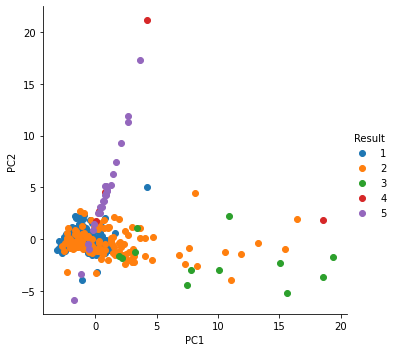

In [27]:
sns.FacetGrid(data_pca, hue='Result', height=5).map(plt.scatter, 'PC1', 'PC2').add_legend()

#### Applying a Logit model with PCA dimension reduction ####

In [28]:
# Initialize the logistic regression model
logit_model = LogisticRegression(multi_class='multinomial', solver='lbfgs',random_state=42)

# Apply PCA transformation to the validation data (X_test_scaled is the validation dataset after scaling in data pre-processing)
X_validation_pca = pca.transform(X_test_scaled)

# Train the model using the PCA-transformed training dataset
logit_model.fit(X_train_pca, y_train)
# Predict the results on the validation dataset (after PCA transformation)
y_pred = logit_model.predict(X_validation_pca)

# Evaluate the model's performance
print('Logit Model Classification Report(with PCA):')
print(classification_report(y_test, y_pred))
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Logit Model Classification Report(with PCA):
              precision    recall  f1-score   support

           1       0.64      0.88      0.74         8
           2       0.75      0.50      0.60         6
           5       0.00      0.00      0.00         1

    accuracy                           0.67        15
   macro avg       0.46      0.46      0.45        15
weighted avg       0.64      0.67      0.63        15


Confusion Matrix:
[[7 1 0]
 [3 3 0]
 [1 0 0]]


C:\Users\Ling\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ling\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ling\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
pca.fit(X_train_scaled)
# Eigenvalues and explained variance
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_ * 100
cumulative_variance = np.cumsum(explained_variance_ratio)

#Creating the table for eignvalues and variance explained
table_eigenvalues = pd.DataFrame({
    'PCA': ['PC1', 'PC2'],
    'Eigenvalue': eigenvalues,
    '% Variance Explained': explained_variance_ratio,
    'Cumulative % Variance Explained': cumulative_variance
})

#Display the tables
table_eigenvalues

,PCA,Eigenvalue,% Variance Explained,Cumulative % Variance Explained
0,PC1,9.269302,40.214642,40.214642
1,PC2,4.417275,19.164240,59.378883


In [30]:
# Eigenvectors
eigenvectors = pca.components_

num_features = X_train_scaled.shape[1]

# Create the table for eigenvectors
table_eigenvectors = pd.DataFrame(
    eigenvectors,
    columns=[f'Feature{i+1}' for i in range(num_features)],
    index = ['PC1', 'PC2'])
table_eigenvectors

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24
PC1,0.283486,0.238196,0.244183,0.289476,0.261167,0.290352,0.077125,0.041276,0.087300,0.000000e+00,...,0.282464,0.284483,0.283247,0.073470,0.103168,0.107654,0.101086,0.112811,0.212294,0.045017
PC2,-0.051983,-0.020349,-0.025493,-0.100655,-0.104707,-0.105694,0.351133,0.278790,0.340426,-8.470329e-22,...,-0.098280,-0.100725,-0.081766,0.386094,0.323960,0.354281,0.249026,0.262346,-0.037210,0.165615


### Bonus Task - Analysis, modeling and prediction ###

#### Classification Decision Tree ####

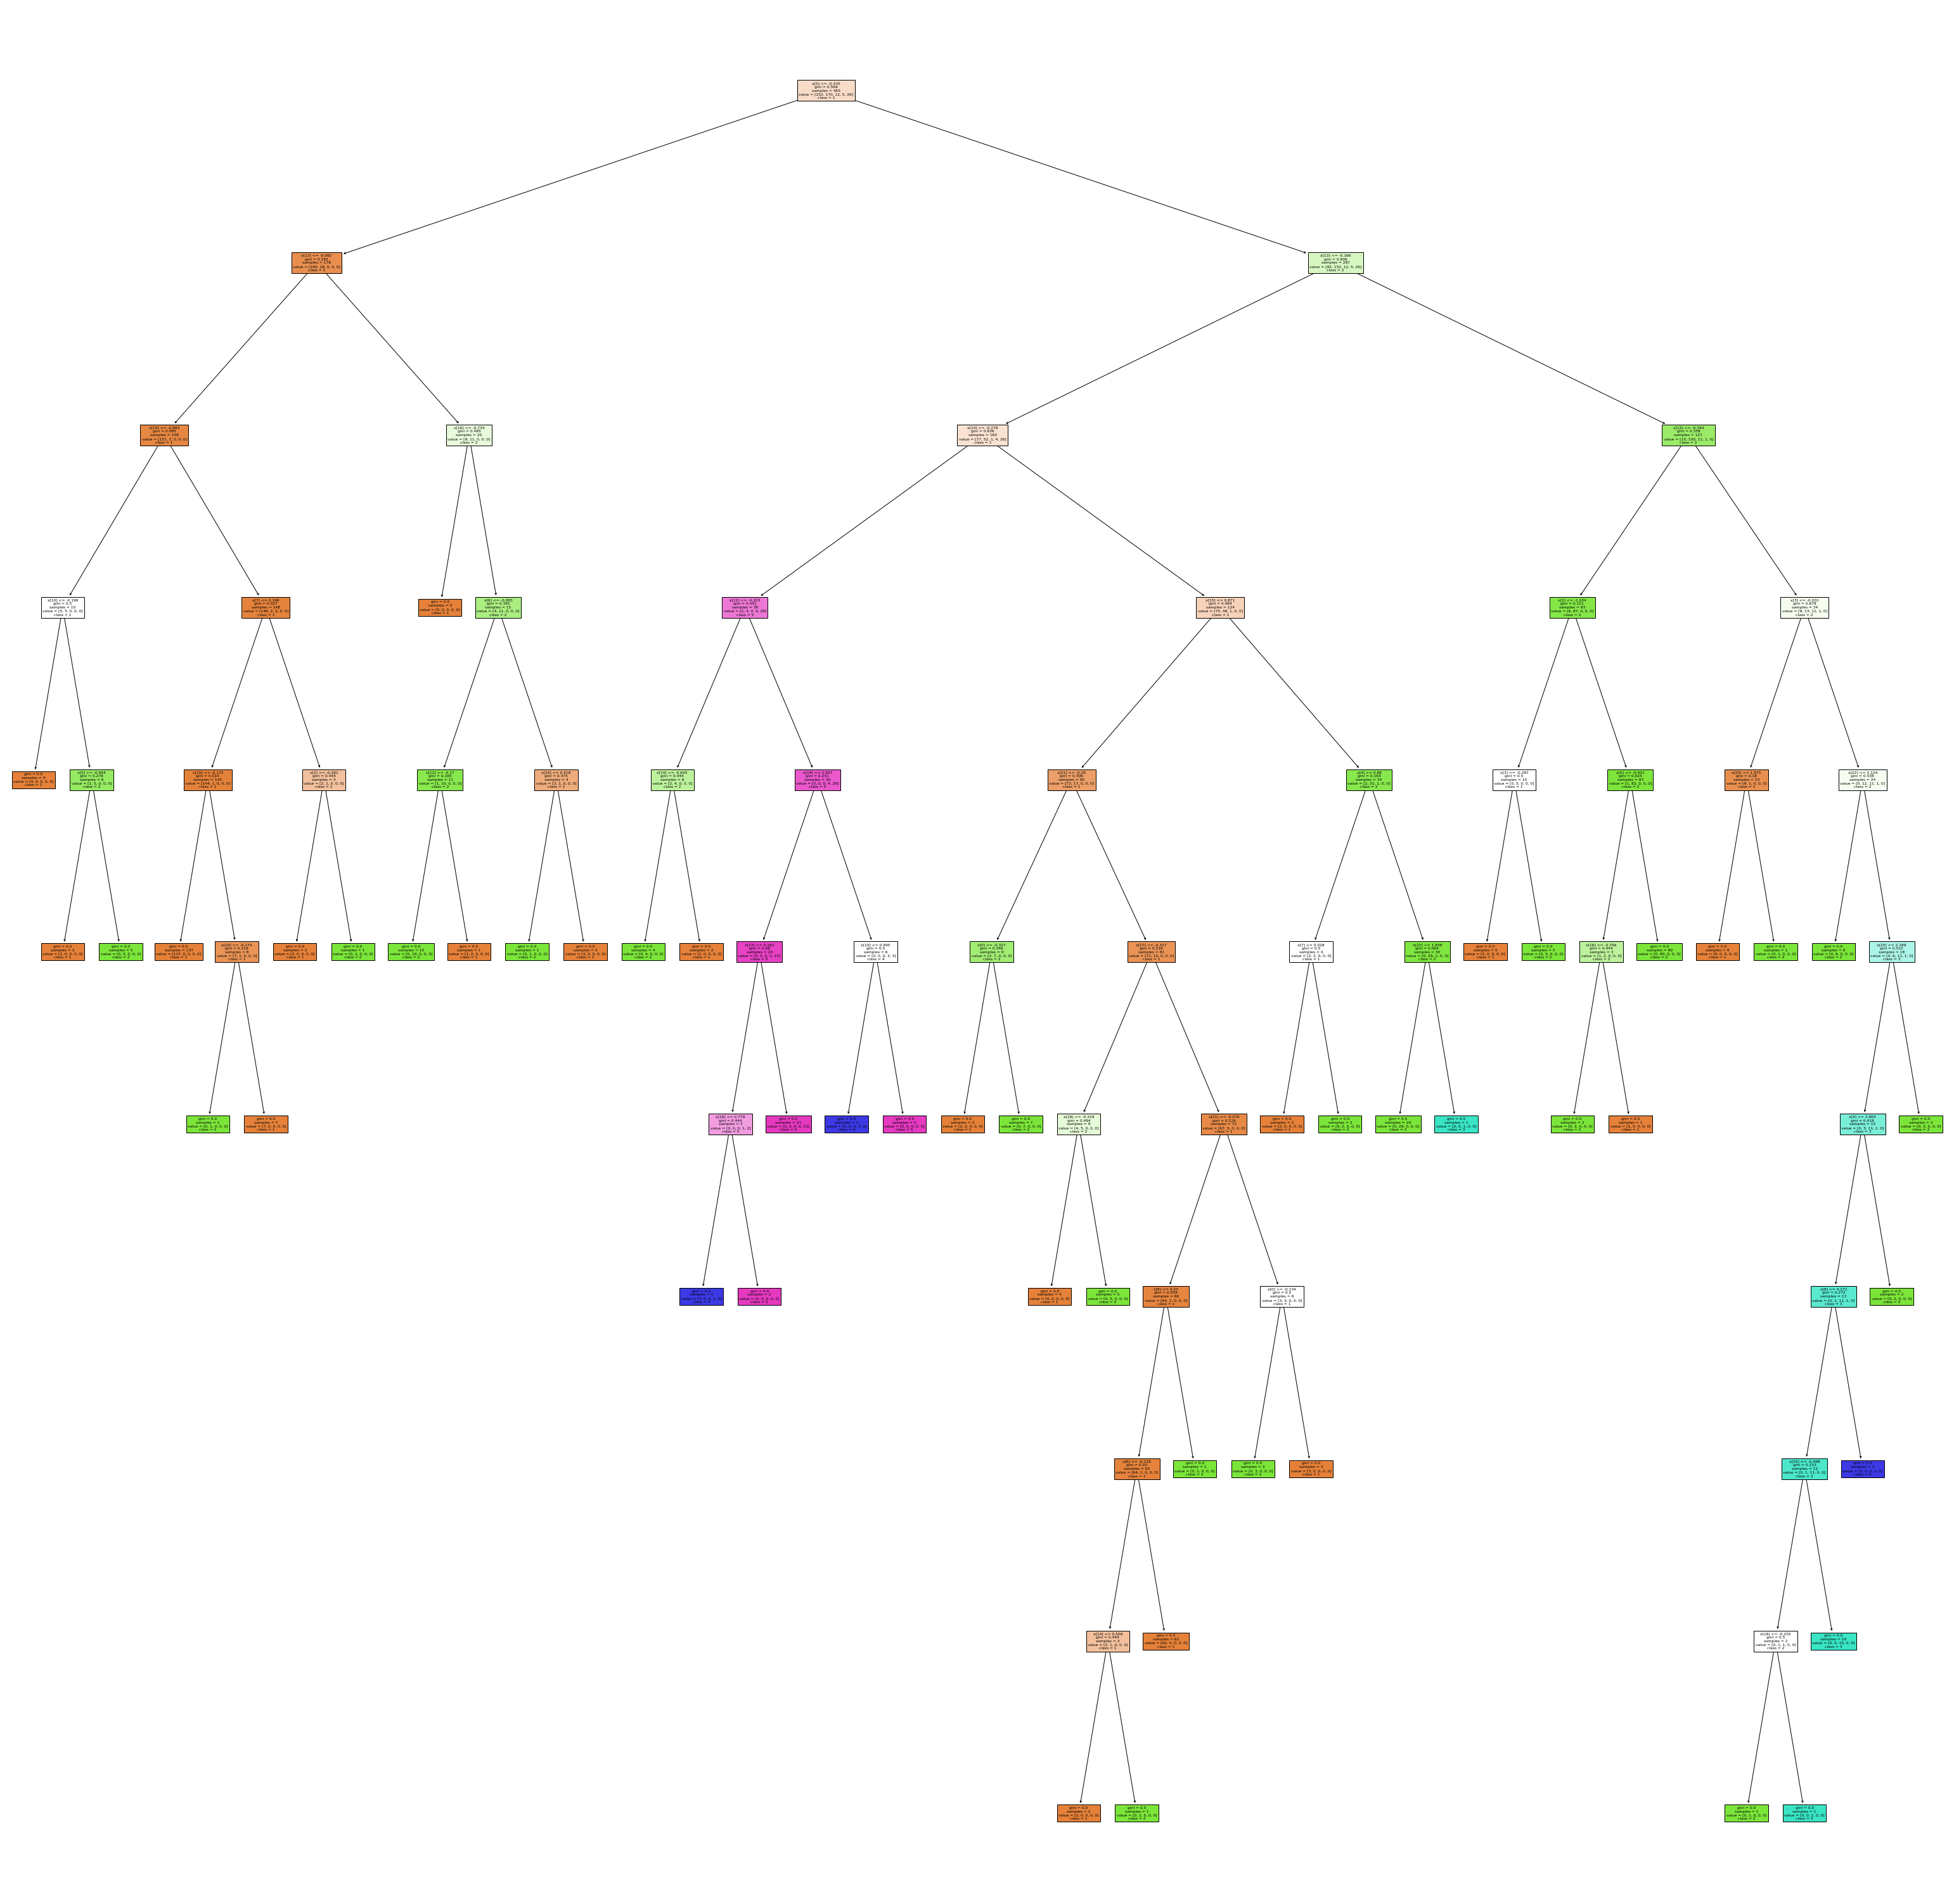

In [31]:
# Initialize and train the decision tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
decision_tree_model.fit(X_train_scaled, y_train)

fig, ax = plt.subplots(figsize=(55, 55))
tree.plot_tree(decision_tree_model, class_names=['1','2','3','4','5'], filled=True)
plt.show()

#### K-Nearest Neighbors (KNN) Decision Boundary ####

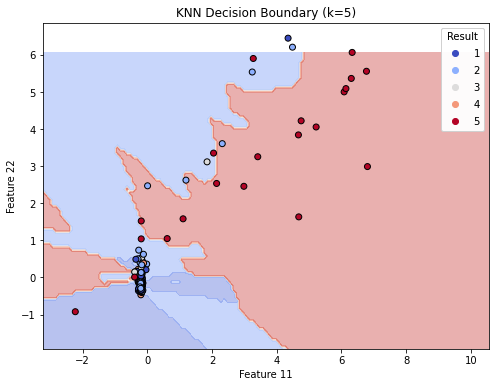

In [38]:
# Select 'Feature11' and 'Feature22' which have individual most highly correlated with the target variable 'Result'
X_train_2d = X_train_scaled[:, [10, 21]]
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_2d, y_train)

# Using Feature11 and Feature22 for visualization
x_min, x_max = X_train_2d[:, 0].min() -1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() -1, X_train_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                    np.arange(y_min, y_max, 0.1))

# Predict class using KNN and plot
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Get unique classes and their corresponding colors from the scatter plot
#unique_classes = np.unique(y_train)
# Create a legend mapping each color to its class
#legend_elements = [Line2D[0], [0], marker='o', color='w', ]

plt.figure(figsize=(8, 6))
# Z contains the decision boundary predictions, xx, yy are the meshgrid arrays
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
# Scatter plot of the two features used to train the KNN
scatter=plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k')

# Add a legend for the scatter plot classes
legend1 = plt.legend(*scatter.legend_elements(), title='Result')
plt.gca().add_artist(legend1)

#plt.legend(handles=scatter.legend_elements()[0], title='Classes')

plt.xlabel('Feature 11')
plt.ylabel('Feature 22')
plt.title('KNN Decision Boundary (k=5)')
plt.show()


#### Linear Discriminant Analysis (LDA) Decision Boundary ####

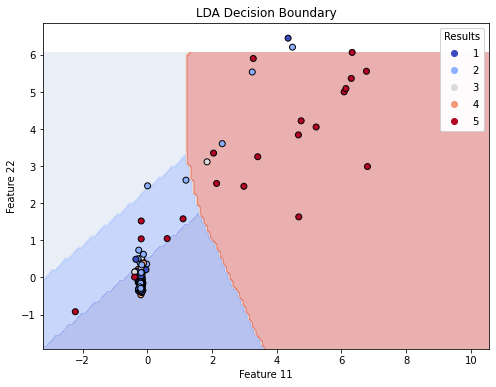

In [39]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train_2d, y_train)
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
#plt.scatter(X_train_scaled[:, 0], X_train_2d[:, 1], c=y_train, s=20, edgecolor='k')

# Scatter plot of the two features used to train the KNN
scatter=plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k')

# Add a legend for the scatter plot classes
legend1 = plt.legend(*scatter.legend_elements(), title='Results')
plt.gca().add_artist(legend1)

plt.xlabel('Feature 11')
plt.ylabel('Feature 22')
plt.title('LDA Decision Boundary')
plt.show()

### Task 4:  Models results and evaluation ####

#### Model Performance Comparations ###

In [34]:
# Initialize models
logit = LogisticRegression(max_iter=2000)
naive_bayes = GaussianNB()
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()
lda = LinearDiscriminantAnalysis()

# Train the models on the training data
logit.fit(X_train_scaled, y_train)
naive_bayes.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)
decision_tree.fit(X_train_scaled, y_train)
lda.fit(X_train_scaled, y_train)

# The models are now trained and can be used to make predictions on the test set
# Predict the results in the test dataset
y_pred_logit = logit.predict(X_test_scaled)
y_pred_naive_bayes = naive_bayes.predict(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)
y_pred_decision_tree = decision_tree.predict(X_test_scaled)
y_pred_lda = lda.predict(X_test_scaled)

predicted_results=y_test.reset_index().drop("index",axis=1) # reset index in test data and remove original index

# Print the table to show the models prediction and the result in the test dataset
predicted_results = pd.DataFrame({'Logit':y_pred_logit, 'Naive Bayes':y_pred_naive_bayes, 'KNN':y_pred_knn, 
                                  'SVM':y_pred_svm, 'Decision Tree':y_pred_decision_tree, 'LDA':y_pred_lda, 'Actual Result': y_test})

#y_test2['prediction']=prediction.tolist()  #add the prediction to the test dataframe

predicted_results

,Logit,Naive Bayes,KNN,SVM,Decision Tree,LDA,Actual Result
200,2,1,1,2,2,2,1
230,1,1,1,1,1,1,1
157,2,1,2,1,2,1,2
1,1,1,1,1,1,1,2
391,1,1,1,1,1,1,1
248,5,5,5,5,5,5,5
234,2,2,1,1,2,1,2
47,1,1,1,1,1,1,1
387,1,2,2,2,2,1,2
130,1,2,1,1,1,1,1


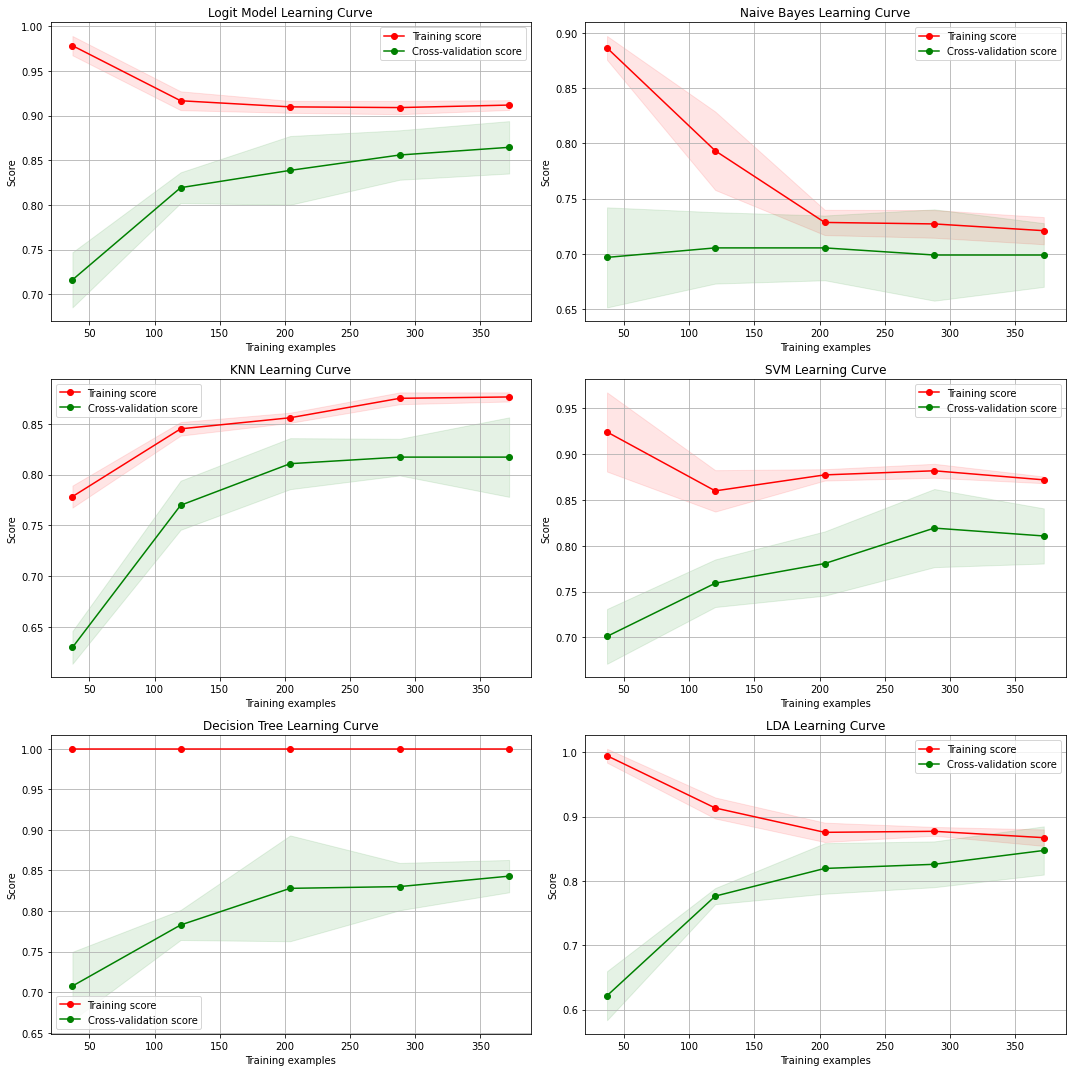

In [35]:
# Plot the learning curve
models = [
    (logit, 'Logit Model'),
    (naive_bayes, 'Naive Bayes'),
    (knn, 'KNN'),
    (svm, 'SVM'),
    (decision_tree, 'Decision Tree'),
    (lda, 'LDA')
]

def plot_learning_curve(estimator, title, X, y, cv):    
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy')
    
    # Calculate mean and standard deviation for train set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation for test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, color="r", alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, color="g", alpha=0.1)
    plt.plot(train_sizes, train_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.title(f'{title} Learning Curve')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    return plt

fig, axes = plt.subplots(3,2, figsize=(15, 15))

for i, (model, title) in enumerate(models):
    plt.subplot(3,2,i+1)
    plot_learning_curve(model, title, X_train_scaled, y_train, cv=5)

plt.tight_layout()
plt.show()

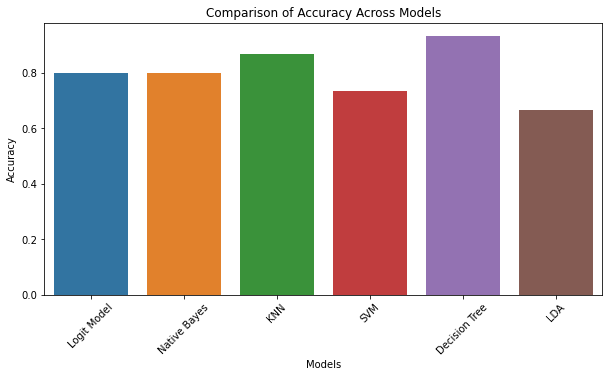

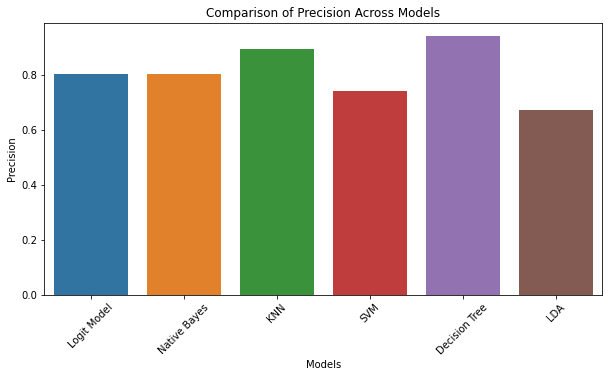

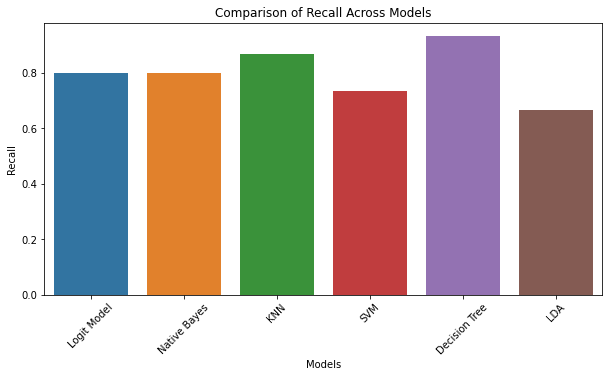

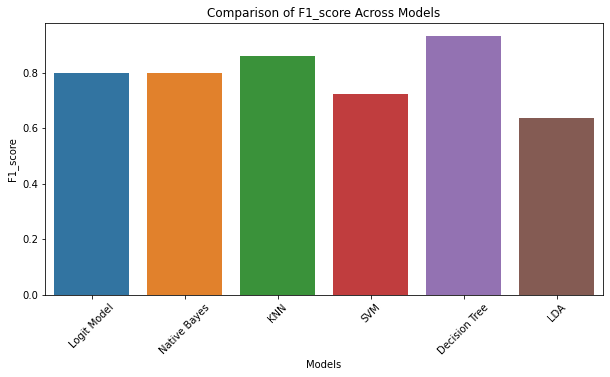

,Model,Accuracy,Precision,Recall,F1_score
0,Logit Model,80.00%,80.15%,80.00%,0.80
1,Native Bayes,80.00%,80.15%,80.00%,0.80
2,KNN,86.67%,89.33%,86.67%,0.86
3,SVM,73.33%,74.00%,73.33%,0.72
4,Decision Tree,93.33%,94.07%,93.33%,0.93
5,LDA,66.67%,67.27%,66.67%,0.64


In [22]:
models = {
    'Logit Model': LogisticRegression(max_iter=2000, multi_class='multinomial'),
    'Native Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'LDA': LinearDiscriminantAnalysis()
}

# DataFrame to store results
results_df = pd.DataFrame(columns=['Model','Experiment', 'Actual Result', 'Prediction'])

# Store the evaluation metrics
metrics_summary = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1_score': []
}

# Iterate over models to train, predict, and evaluate
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)
    # Predict on the test dataset
    predictions = model.predict(X_test_scaled)
    
    # Append predictions to the results DataFrame
    temp_df = pd.DataFrame({
        'Model Name': model_name,
        'Experiment No.': X_test.index,
        'Actual Result': y_test,
        'Prediction': predictions,
        })
    results_df = pd.concat([results_df, temp_df], ignore_index=True)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    
    # Append metrics to the summary dictionary
    metrics_summary['Model'].append(model_name)
    metrics_summary['Accuracy'].append(accuracy)
    metrics_summary['Precision'].append(precision)
    metrics_summary['Recall'].append(recall)
    metrics_summary['F1_score'].append(f1)
    
# Convert metrics summary to a DataFrame
metrics_df = pd.DataFrame(metrics_summary)

# Visualization
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1_score']
for metric in metrics_to_plot:
    plt.figure(figsize=(10,5))
    sns.barplot(x='Model', y=metric, data=metrics_df)
    plt.title(f'Comparison of {metric} Across Models')
    plt.ylabel(metric)
    plt.xlabel('Models')
    plt.xticks(rotation=45)
    plt.show()
    
# Print out the results table
metrics_df['Accuracy'] = metrics_df['Accuracy'].apply(lambda x: f'{x:.2%}')
metrics_df['Precision'] = metrics_df['Precision'].apply(lambda x: f'{x:.2%}')
metrics_df['Recall'] = metrics_df['Recall'].apply(lambda x: f'{x:.2%}')
metrics_df['F1_score'] = metrics_df['F1_score'].apply(lambda x: f'{x:.2f}')
metrics_df